In [714]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [715]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [716]:
import pandas as pd
import numpy as np

In [717]:
x , y = make_classification(n_samples=500, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [718]:
x

array([[-1.79336584e-01, -1.30097592e+00],
       [-5.02490809e-01, -2.13845066e+00],
       [-1.34184156e+00, -1.57580406e+00],
       [ 7.76487098e-01, -7.26537779e-01],
       [-1.15481280e+00, -2.62242001e+00],
       [ 9.05848073e-01,  6.88578566e-01],
       [-7.30893314e-01, -8.63530513e-02],
       [ 6.93695961e-01, -2.77231115e-02],
       [ 1.87127396e-01, -7.32117914e-01],
       [ 7.55986471e-01,  4.38884738e-01],
       [ 2.54074501e+00, -1.28242688e+00],
       [-3.10319263e-02,  4.69022895e-01],
       [ 1.13419830e+00, -1.44454035e+00],
       [ 9.58869959e-01,  9.38715840e-01],
       [-1.54492348e-01, -9.77387594e-01],
       [ 7.58593765e-01,  1.21266996e+00],
       [ 1.65702064e-01, -2.08709548e+00],
       [ 1.38520783e+00,  8.03882795e-01],
       [ 1.75302572e+00,  6.27501871e-01],
       [ 4.08223759e-01,  3.54216982e-01],
       [ 2.48790345e-01,  1.17054017e+00],
       [-4.62585362e-01,  8.10314827e-01],
       [ 2.71055414e-02, -2.03653934e+00],
       [ 1.

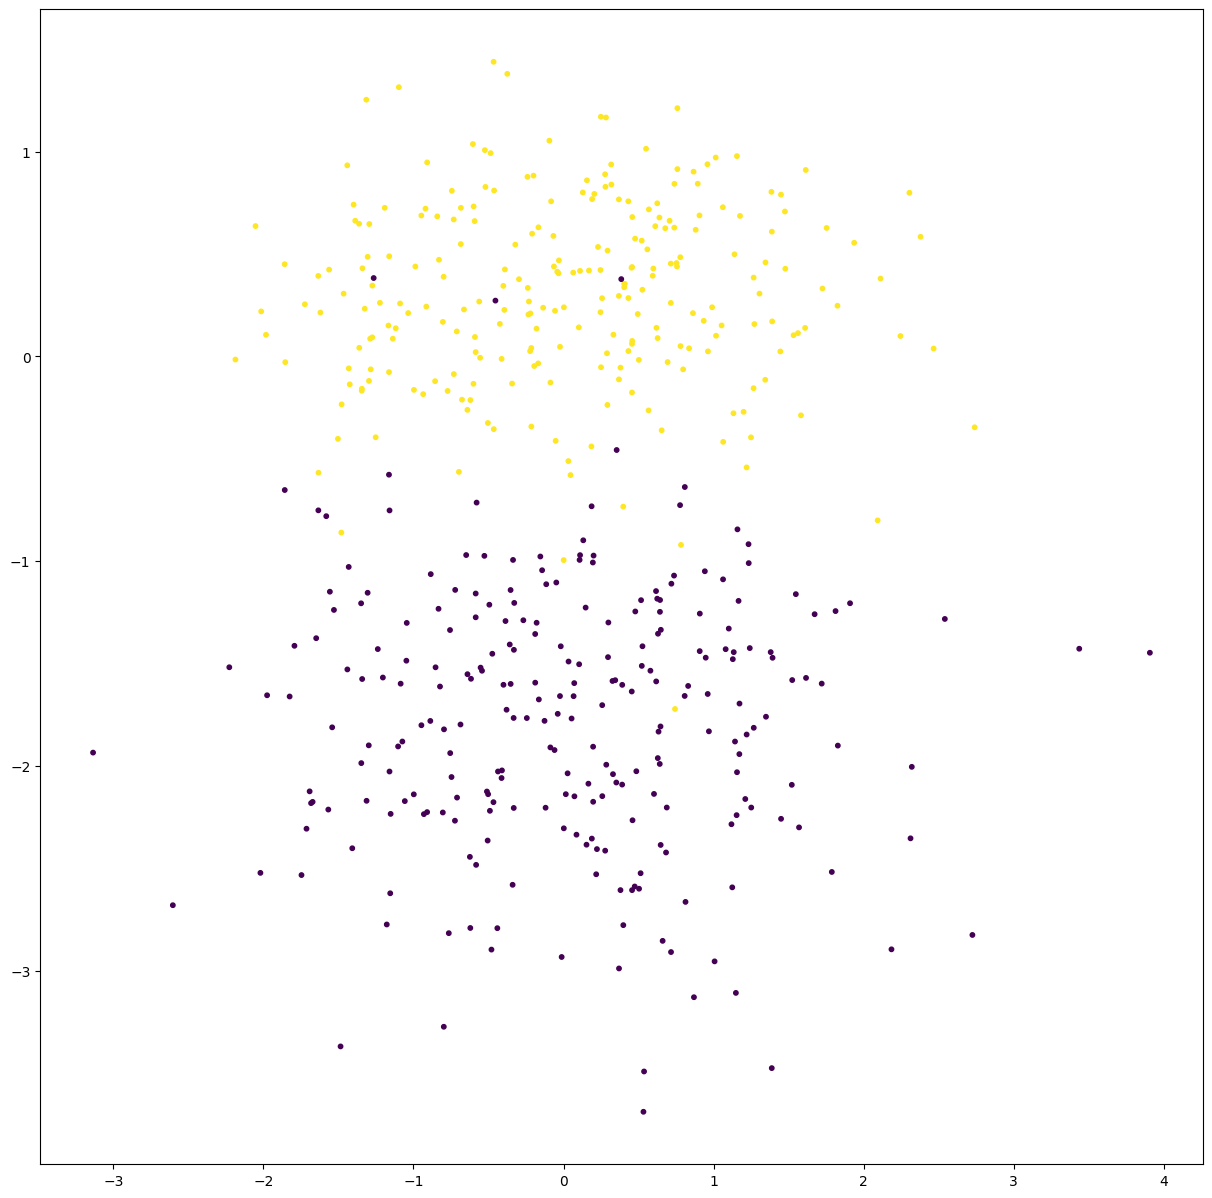

In [719]:
plt.figure(figsize=(15,15))
plt.scatter(x[:,0],x[:,1],c = y, s=10)

In [720]:
def step(z):
    return 1 if z>0 else 0

In [721]:
def perceptron(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(5000):
        j = np.random.randint(0,500)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [722]:

intercept_,coef_ = perceptron(x,y)

In [723]:
intercept_

0.20000000000000015

In [724]:
coef_

array([0.05364965, 0.51102623])

In [725]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [726]:
x_input = np.linspace(-3,3,500)
y_input = m*x_input + b

(-3.0, 2.0)

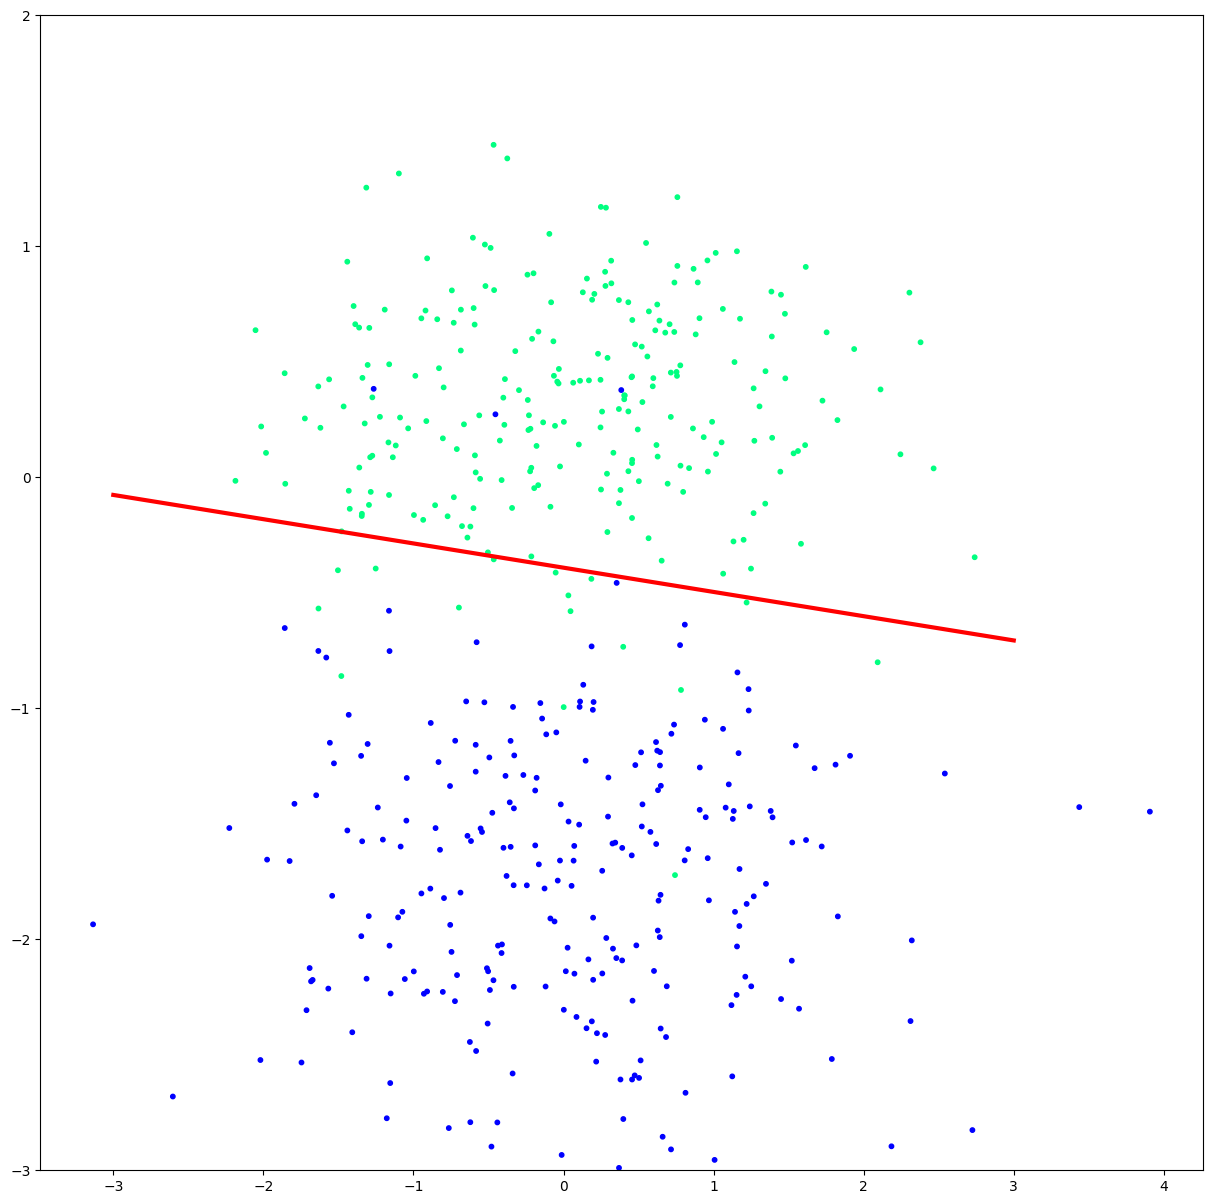

In [727]:
plt.figure(figsize=(15,15))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,2)

In [728]:
def perceptron(x,y):
    
    m = []
    b = []
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,500)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [729]:

m,b = perceptron(x,y)

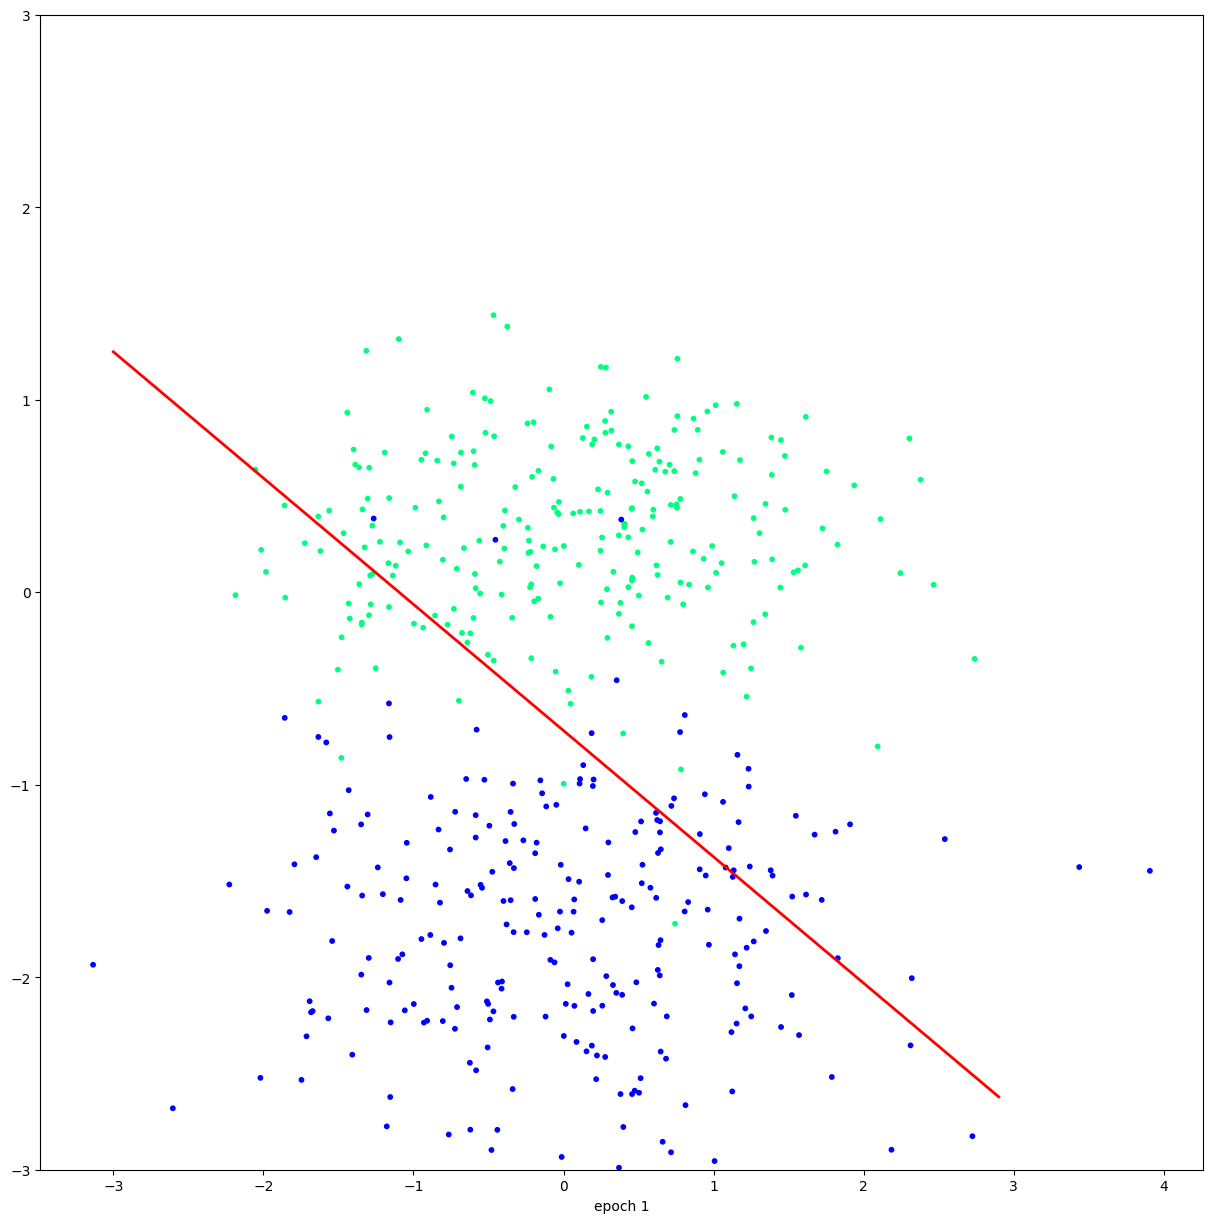

In [730]:
fig, ax = plt.subplots(figsize=(15,15))

x_i = np.arange(-3, 3 , 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [731]:
model = LogisticRegression()

In [732]:
model.fit(x,y)

LogisticRegression()

In [733]:
m = -(model.coef_[0][0]/model.coef_[0][1])
b = -(model.intercept_/model.coef_[0][1])

In [734]:
x_input1 = np.linspace(-3,3,500)
y_input1 = m*x_input + b

(-3.0, 3.0)

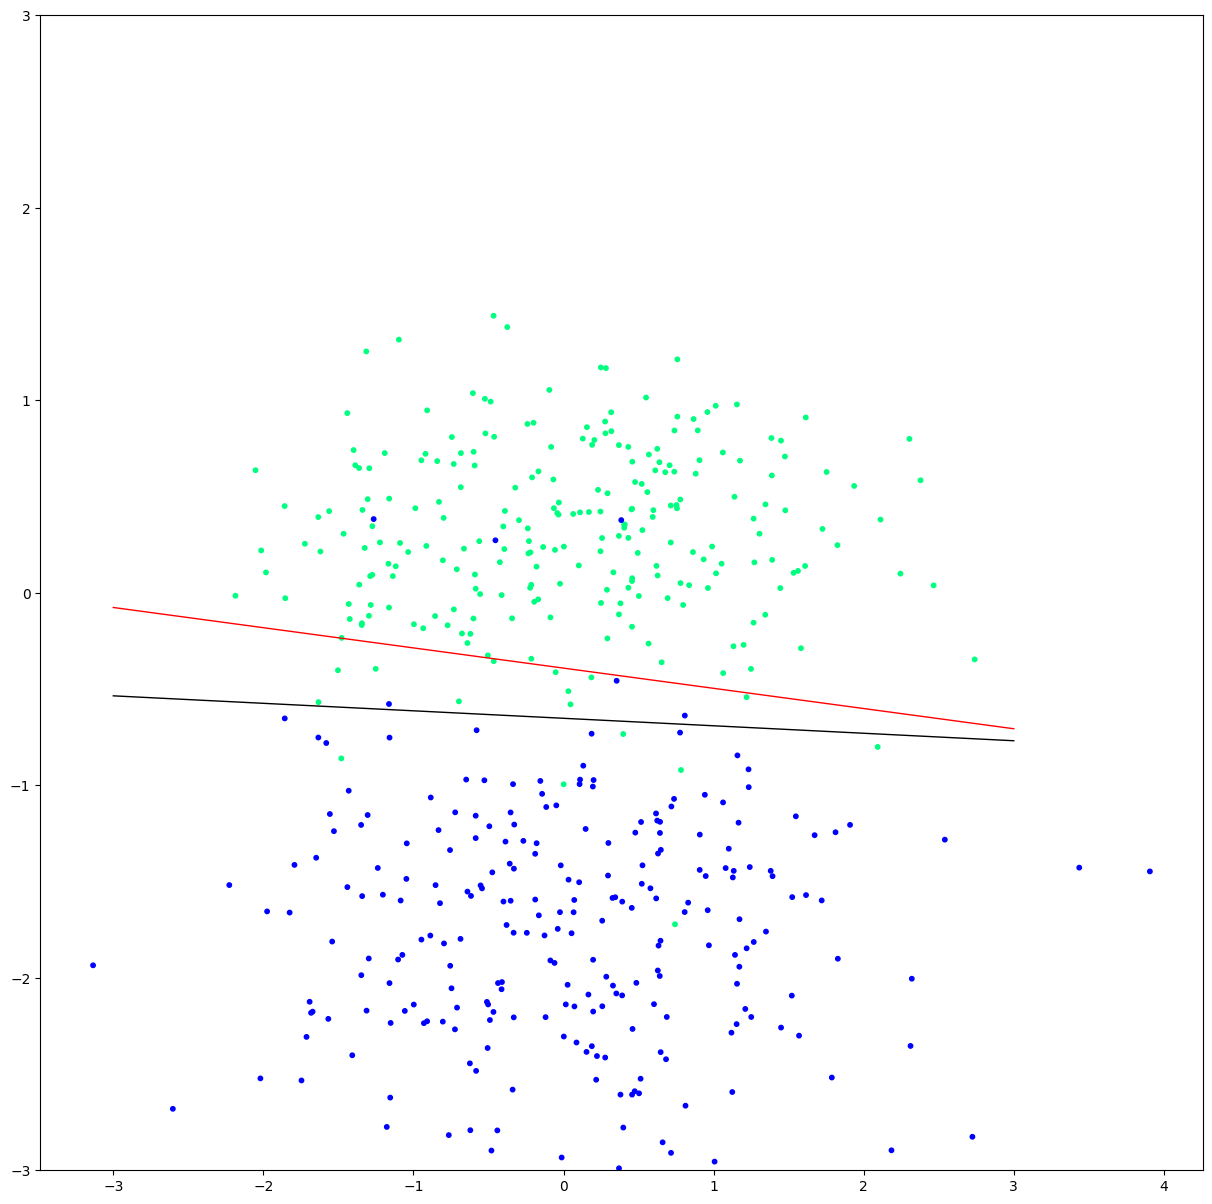

In [735]:

plt.figure(figsize=(15,15))
plt.plot(x_input,y_input,color='red',linewidth=1)
plt.plot(x_input1,y_input1,color='black',linewidth=1)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,3)

In [736]:
x , y = make_classification(n_samples=500, n_features=2, n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [737]:
x

array([[-1.79336584e-01, -1.30097592e+00],
       [-5.02490809e-01, -2.13845066e+00],
       [-1.34184156e+00, -1.57580406e+00],
       [ 7.76487098e-01, -7.26537779e-01],
       [-1.15481280e+00, -2.62242001e+00],
       [ 9.05848073e-01,  6.88578566e-01],
       [-7.30893314e-01, -8.63530513e-02],
       [ 6.93695961e-01, -2.77231115e-02],
       [ 1.87127396e-01, -7.32117914e-01],
       [ 7.55986471e-01,  4.38884738e-01],
       [ 2.54074501e+00, -1.28242688e+00],
       [-3.10319263e-02,  4.69022895e-01],
       [ 1.13419830e+00, -1.44454035e+00],
       [ 9.58869959e-01,  9.38715840e-01],
       [-1.54492348e-01, -9.77387594e-01],
       [ 7.58593765e-01,  1.21266996e+00],
       [ 1.65702064e-01, -2.08709548e+00],
       [ 1.38520783e+00,  8.03882795e-01],
       [ 1.75302572e+00,  6.27501871e-01],
       [ 4.08223759e-01,  3.54216982e-01],
       [ 2.48790345e-01,  1.17054017e+00],
       [-4.62585362e-01,  8.10314827e-01],
       [ 2.71055414e-02, -2.03653934e+00],
       [ 1.

In [738]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

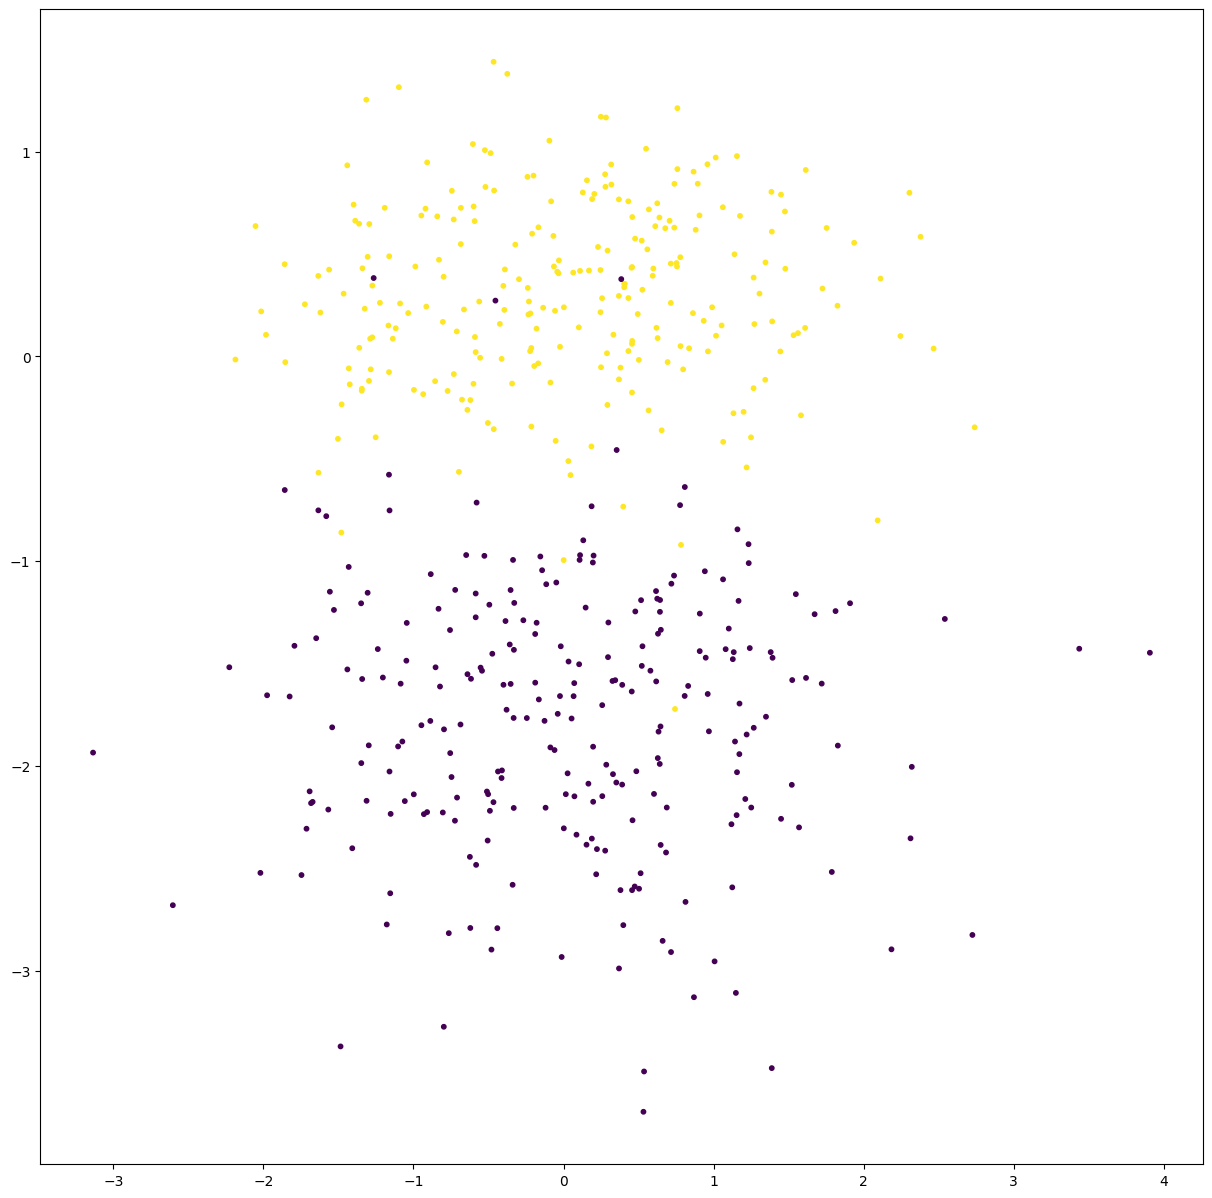

In [739]:
plt.figure(figsize=(15,15))
plt.scatter(x[:,0],x[:,1],c = y, s=10)

In [740]:
def step(z):
    return 1 if z>0 else 0

In [741]:
def perceptron(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(8000):
        j = np.random.randint(0,500)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [742]:
intercept_,coef_ = perceptron(x,y)

In [743]:
intercept_

0.30000000000000016

In [744]:
coef_

array([-0.31036556,  0.62046215])

In [745]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [746]:
x_input = np.linspace(-3,3,500)
y_input = m*x_input + b

(-3.0, 3.0)

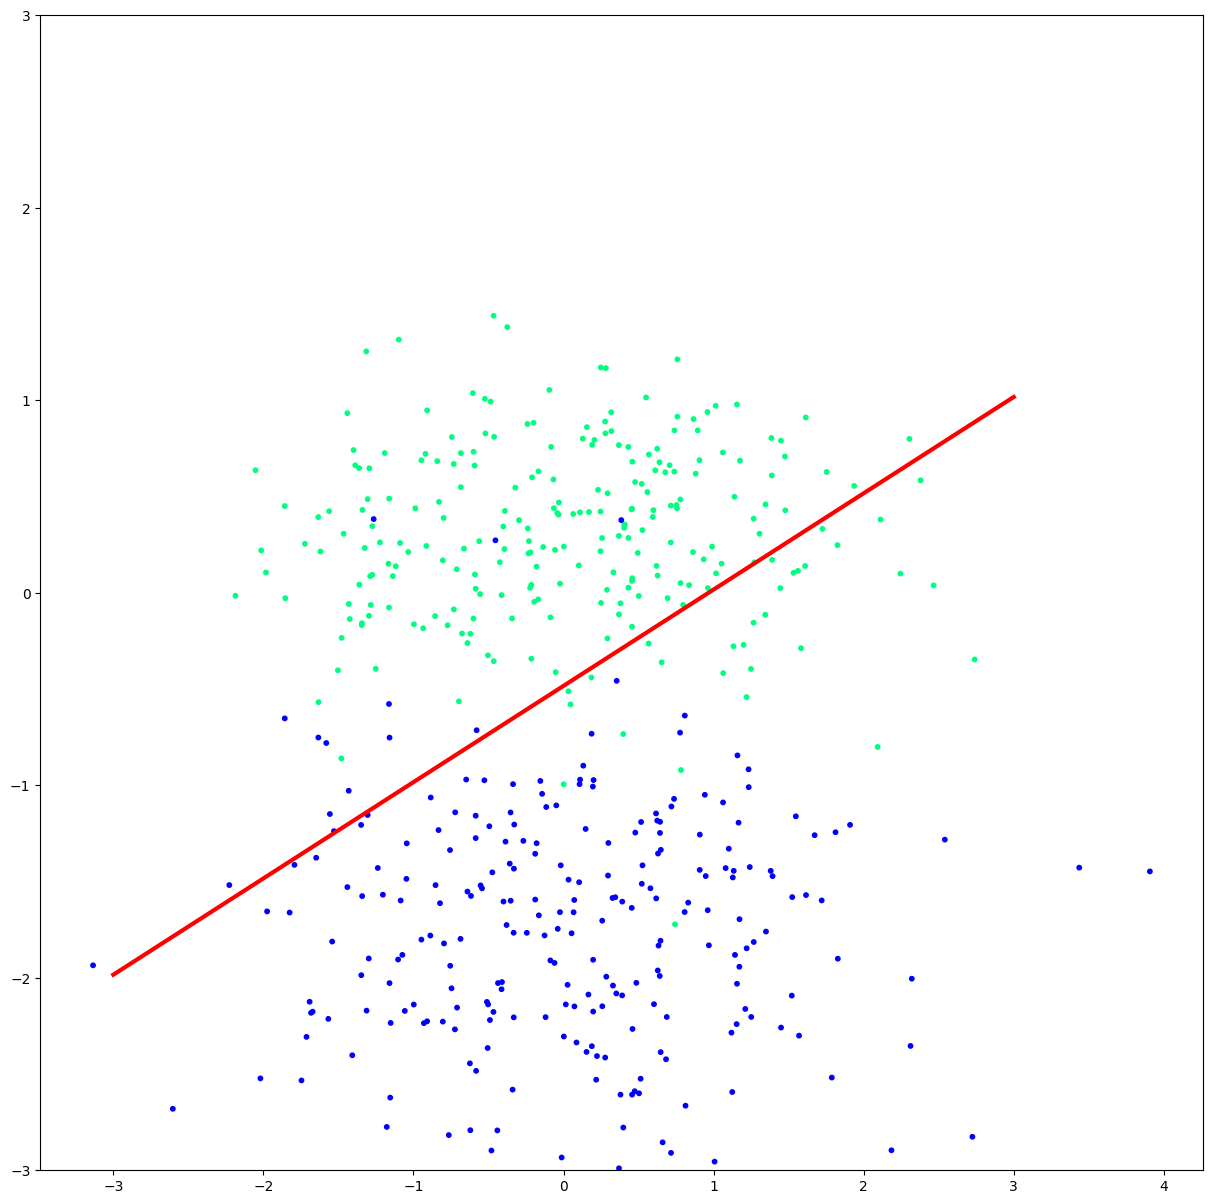

In [747]:
plt.figure(figsize=(15,15))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,3)

In [748]:
model = LogisticRegression()

In [749]:

model.fit(x,y)

LogisticRegression()

In [750]:

m = -(model.coef_[0][0]/model.coef_[0][1])
b = -(model.intercept_/model.coef_[0][1])

In [751]:

x_input1 = np.linspace(-3,3,500)
y_input1 = m*x_input + b

(-3.0, 3.0)

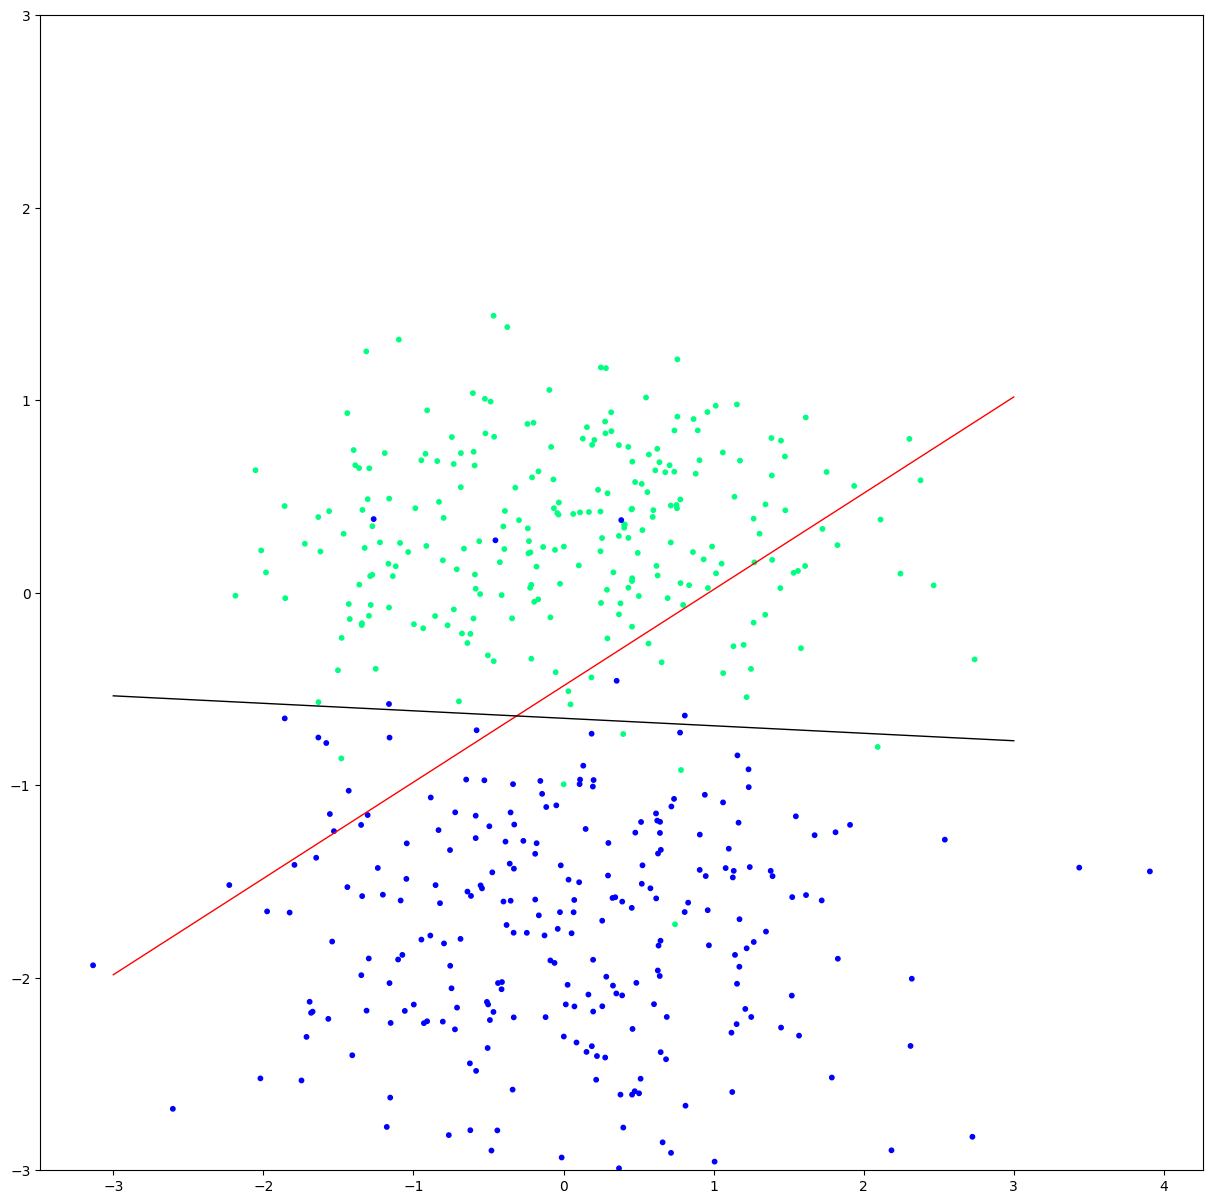

In [752]:
plt.figure(figsize=(15,15))
plt.plot(x_input,y_input,color='red',linewidth=1)
plt.plot(x_input1,y_input1,color='black',linewidth=1)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,3)

In [753]:

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [754]:
def perceptron(x,y):
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [755]:
intercept_,coef_ = perceptron(x,y)

In [756]:

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [757]:
x_input2 = np.linspace(-3,3,500)
y_input2 = m*x_input + b

(-3.0, 3.0)

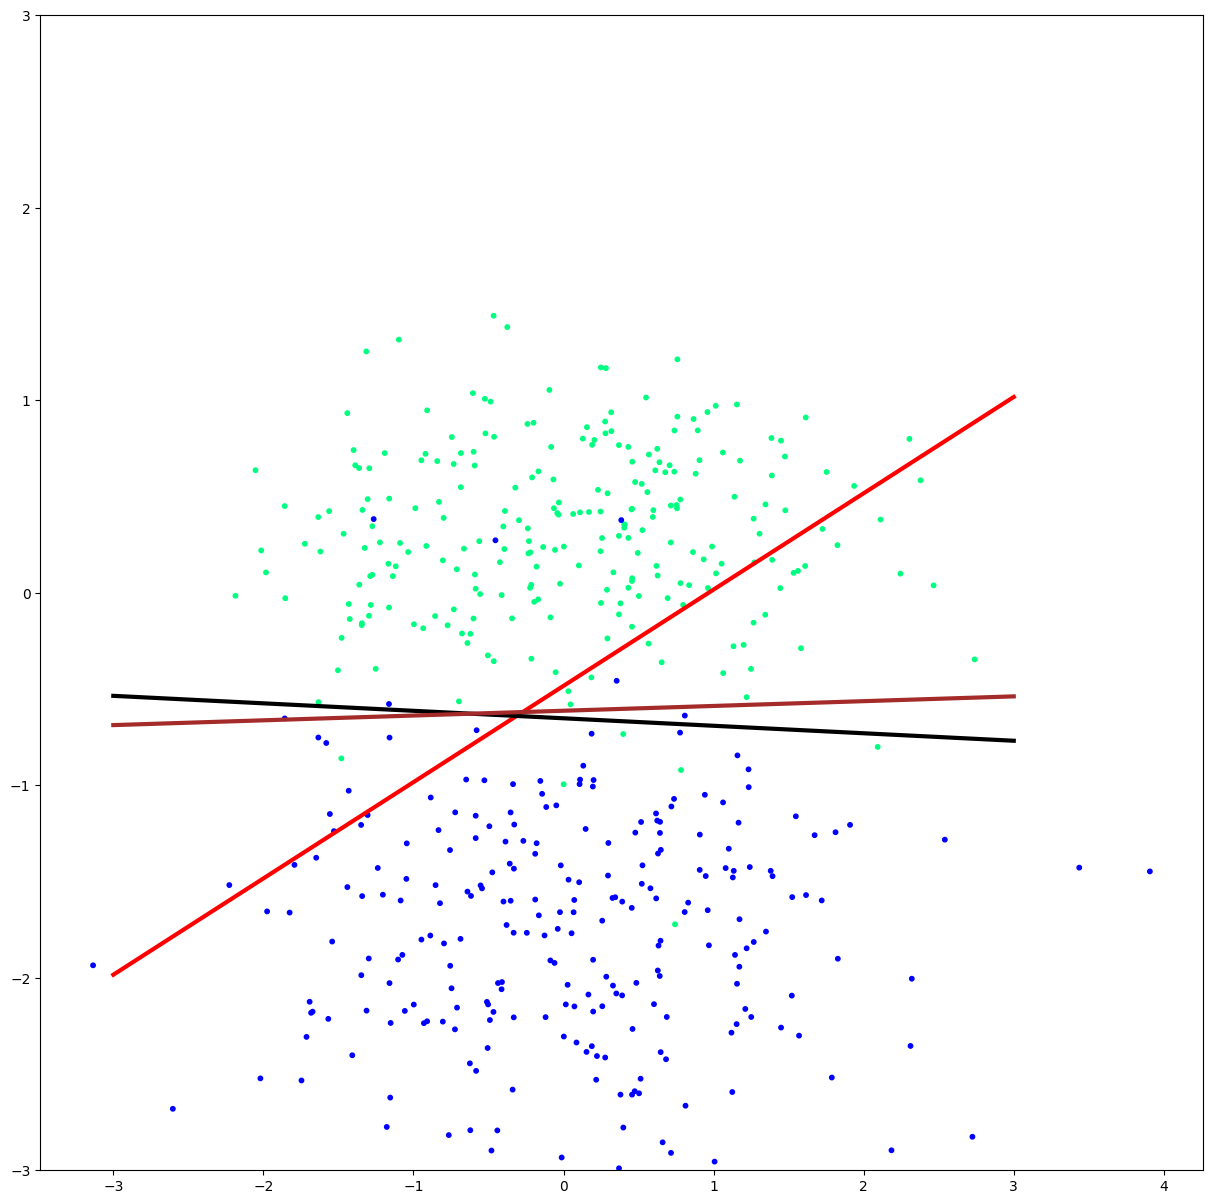

In [758]:
plt.figure(figsize=(15,15))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=10)
plt.ylim(-3,3)

In [759]:
def perceptron(x,y):
    
    m = []
    b = []
    
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(x[j],weights))
        weights = weights + lr*(y[j]-y_hat)*x[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [760]:
m,b = perceptron(x,y)

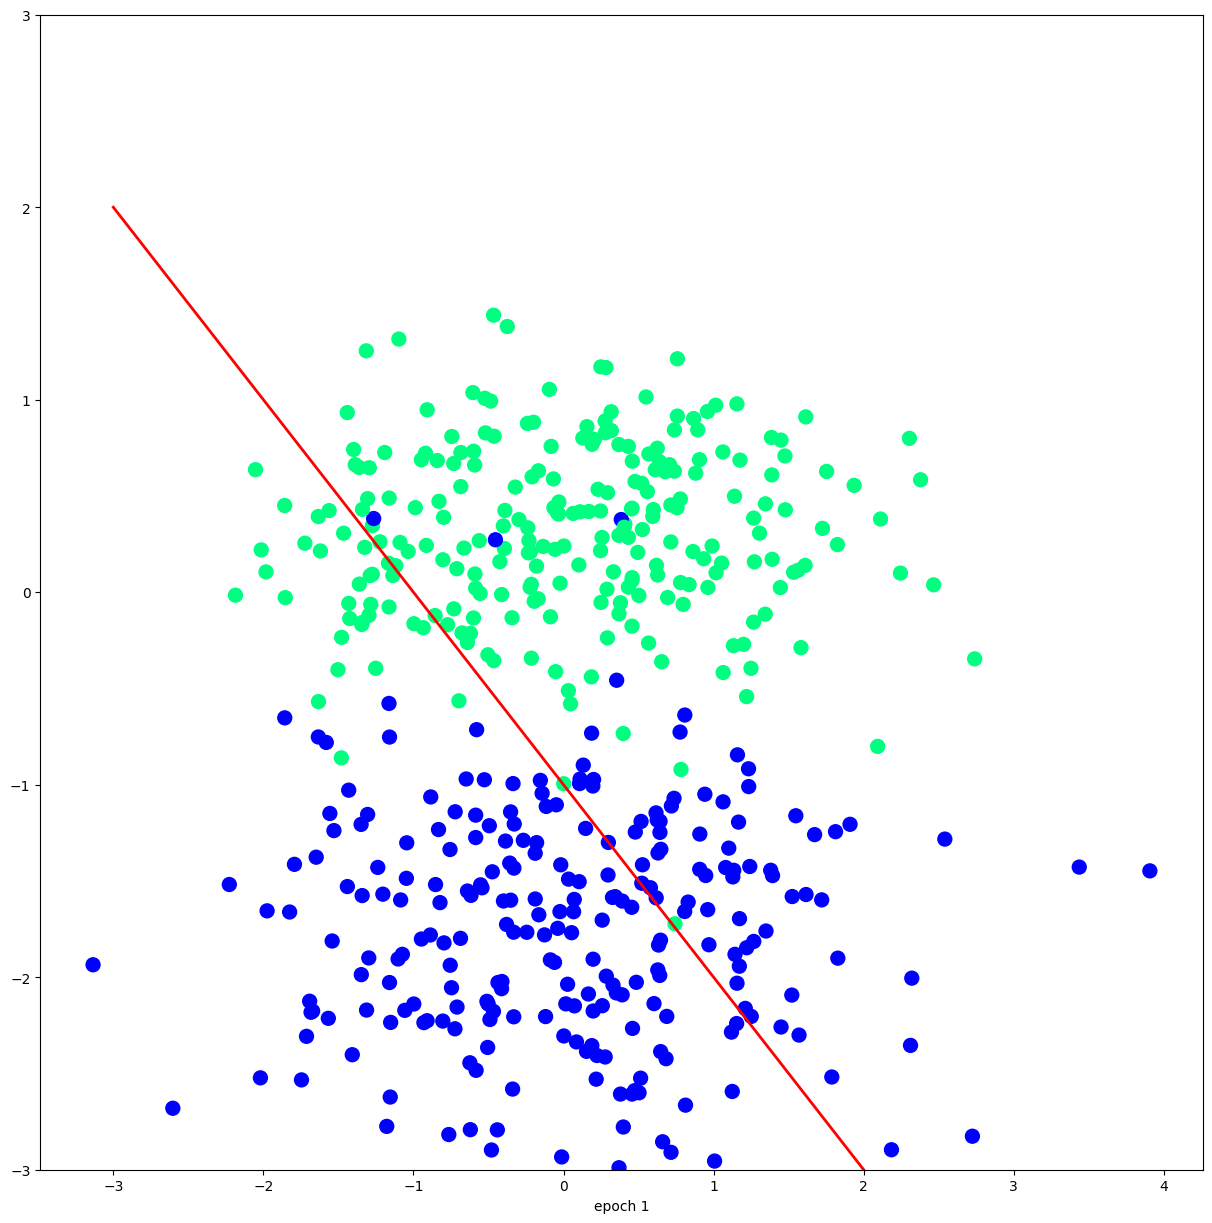

In [761]:
fig, ax = plt.subplots(figsize=(15,15))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)